<a href="https://colab.research.google.com/github/ThettOo/IN6227-2023-Assignment-1.2/blob/main/IN6227_2023_Assignment_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time


# Data Exploration
```
# Load the Census Income dataset from the UCI ML Repository
https://archive.ics.uci.edu/ml/datasets/Census+Income

Two imcome types (classes) 
1.   >50K
2.   <=50K  

Category Features = "workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"
Number Features = "age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"


```



In [ ]:
# Load the data
data_url = 'https://archive.ics.uci.edu/ml/datasets/Census+Income'
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
         "hours-per-week", "native-country", "income"]
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   names=names, sep=',\s', na_values=["?"], engine='python')

#Print the first few rows of the dataset
print(data)


       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

**Summary statistics** 

In [ ]:
# Display summary statistics
print(data.describe())


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


**Frequency and Mode**

Column: workclass
Frequency:
Private             0.738682
Self-emp-not-inc    0.082701
Local-gov           0.068120
State-gov           0.042246
Self-emp-inc        0.036322
Federal-gov         0.031245
Without-pay         0.000456
Never-worked        0.000228
Name: workclass, dtype: float64
Mode: ['Private']



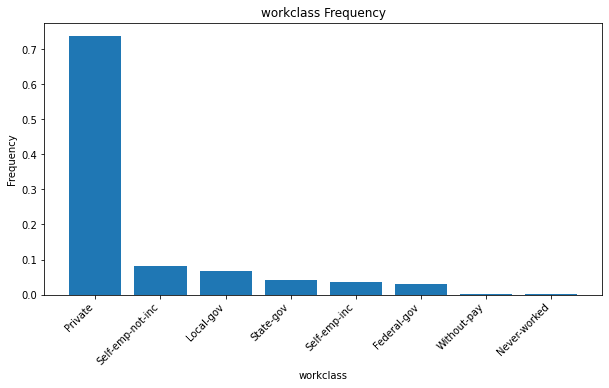

Column: education
Frequency:
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Mode: ['HS-grad']



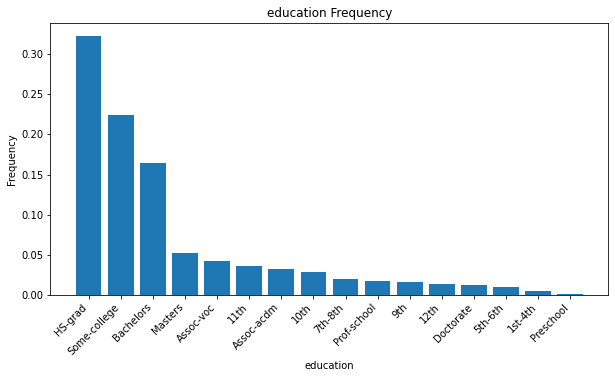

Column: marital-status
Frequency:
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital-status, dtype: float64
Mode: ['Married-civ-spouse']



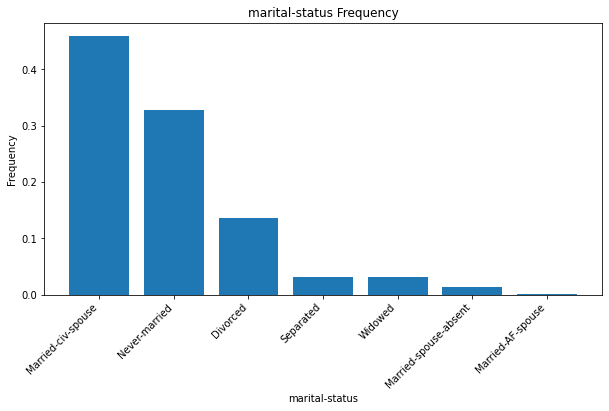

Column: occupation
Frequency:
Prof-specialty       0.134774
Craft-repair         0.133440
Exec-managerial      0.132365
Adm-clerical         0.122729
Sales                0.118823
Other-service        0.107266
Machine-op-inspct    0.065174
Transport-moving     0.051989
Handlers-cleaners    0.044599
Farming-fishing      0.032359
Tech-support         0.030210
Protective-serv      0.021128
Priv-house-serv      0.004851
Armed-Forces         0.000293
Name: occupation, dtype: float64
Mode: ['Prof-specialty']



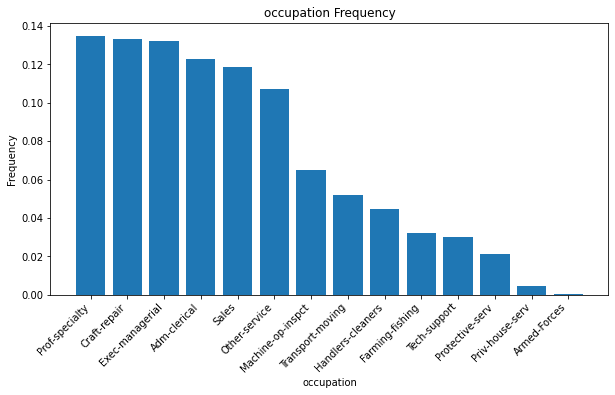

Column: relationship
Frequency:
Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: relationship, dtype: float64
Mode: ['Husband']



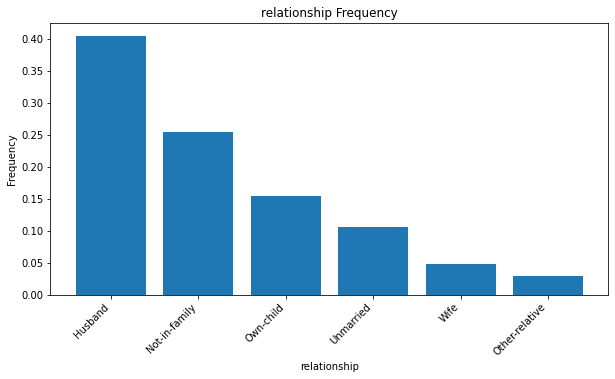

Column: race
Frequency:
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64
Mode: ['White']



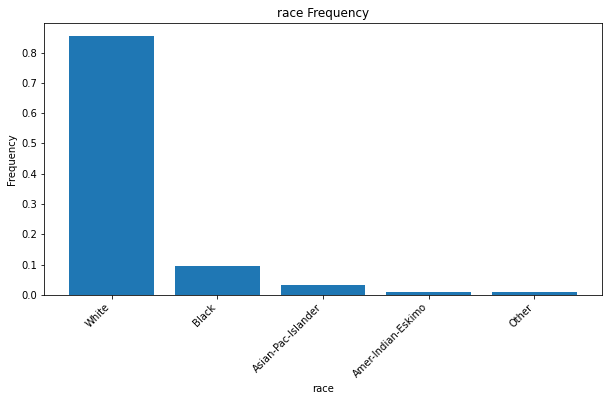

Column: sex
Frequency:
Male      0.669205
Female    0.330795
Name: sex, dtype: float64
Mode: ['Male']



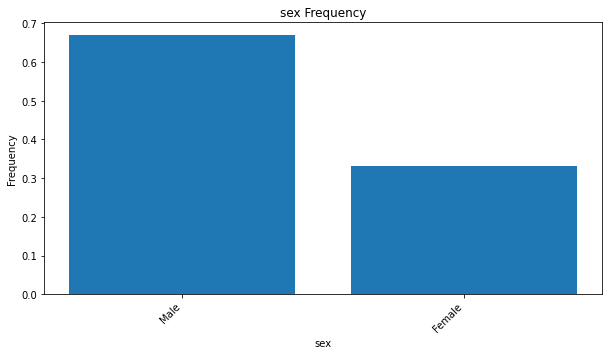

Column: native-country
Frequency:
United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     

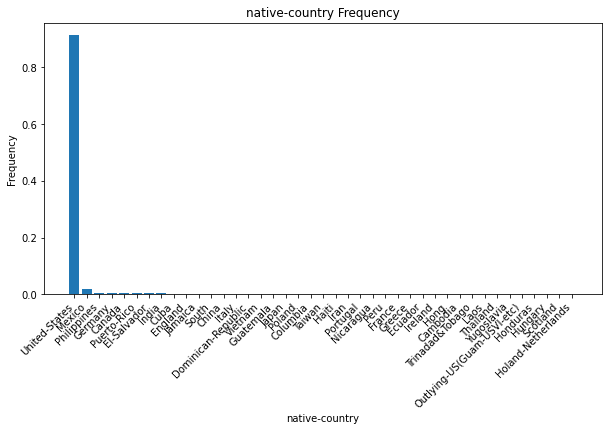

Column: income
Frequency:
<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64
Mode: ['<=50K']



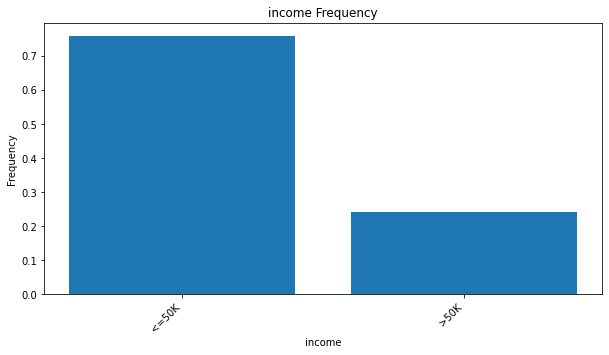

In [ ]:
import matplotlib.pyplot as plt
# Compute frequency and mode of categorical columns
for column in data.select_dtypes(include="object"):
    frequencies = data[column].value_counts(normalize=True)
    modes = data[column].mode().values
    print("Column:", column)
    print("Frequency:")
    print(frequencies)
    print("Mode:", modes)
    print()

 # Plot bar chart of frequencies
    plt.figure(figsize=(10,5))
    plt.bar(frequencies.index, frequencies.values)
    plt.title(f"{column} Frequency")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.show()

workclass, occupation, native-country columns have null values. 

# Preprocessing the data
**Missing Value handling**

Missing values are replaced with the mode of the respective columns. Categorical variables are converted to numerical using the one-hot encoding technique. Numerical variables are normalized.



In [ ]:
# Replace missing values with the mode
data = data.replace('?', np.nan)
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Encode categorical variables
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
data = pd.get_dummies(data, columns=cat_columns)

# Normalize numerical variables
num_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data[num_columns] = (data[num_columns] - data[num_columns].mean()) / data[num_columns].std()


data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030670,-1.063594,1.134721,0.148451,-0.216656,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837096,-1.008692,1.134721,-0.145918,-0.216656,-2.222119,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042641,0.245075,-0.420053,-0.145918,-0.216656,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057031,0.425795,-1.197440,-0.145918,-0.216656,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775756,1.408154,1.134721,-0.145918,-0.216656,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849067,0.639731,0.746028,-0.145918,-0.216656,-0.197406,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.103982,-0.335428,-0.420053,-0.145918,-0.216656,-0.035429,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,1.423588,-0.358772,-0.420053,-0.145918,-0.216656,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,-1.215625,0.110958,-0.420053,-0.145918,-0.216656,-1.655199,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the data 

The data is splitted into train and test sets with a ratio of 80:20 using the train_test_split function from sklearn.

The train_test sets ratio with 70:30 is faster in training the models than the train_test set ratio 80:20. But the accuary of ratio 80:20 is better than 70:30 ratio. 

In this assignment, the data is not too much and it is acceptable time to train the model with the test set ratio 80:20. 

In [ ]:
# Split the data into train and test sets
X = data.drop(columns=["income"])
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#  Training Two Models

Two models, a Decision Tree Classifier and a Random Forest Classifier models are trained.

In [ ]:
# Decision Tree Model
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_train_time = time.time() - start_time

# Random Forest Model
start_time = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_train_time = time.time() - start_time



**Fine-tune the hyperparameters of models**

To fine-tune the hyperparameters of the decision tree and random forest models, GridSearchCV function from the scikit-learn library is used. This function performs an exhaustive search over a specified parameter grid, and uses cross-validation to evaluate the performance of each combination of hyperparameters. The combination of hyperparameters that yields the best cross-validation score is selected as the optimal hyperparameters for the model.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Hyperparameter Tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
start_time = time.time()
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
dt_grid_search_train_time = time.time() - start_time

# Random Forest Hyperparameter Tuning
# rf_param_grid = {
#     'n_estimators': [50, 100, 200, 500],
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# Random Forest Hyperparameter Tuning
# rf_param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

start_time = time.time()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_grid_search_train_time = time.time() - start_time


#  Evaluating the models

The models are evaluated on the test data using accuracy, precision, recall, and F1-score metrics. The time taken is also calculated to fit and predict for both models.

In [ ]:
# Decision Tree Model Evaluating
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, pos_label='>50K')
dt_recall = recall_score(y_test, y_pred_dt, pos_label='>50K')
dt_f1 = f1_score(y_test, y_pred_dt, pos_label='>50K')

# Random Forest Model Evaluating
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, pos_label='>50K')
rf_recall = recall_score(y_test, y_pred_rf, pos_label='>50K')
rf_f1 = f1_score(y_test, y_pred_rf, pos_label='>50K')

**Evaluating Fine-tuned models**

In [ ]:
# Decision Tree Model Evaluating
y_tune_pred_dt = dt_grid_search.predict(X_test)
dt_tune_accuracy = accuracy_score(y_test, y_tune_pred_dt)
dt_tune_precision = precision_score(y_test, y_tune_pred_dt, pos_label='>50K')
dt_tune_recall = recall_score(y_test, y_tune_pred_dt, pos_label='>50K')
dt_tune_f1 = f1_score(y_test, y_tune_pred_dt, pos_label='>50K')

# Random Forest Model Evaluating
y_tune_pred_rf = rf.predict(X_test)
rf_tune_accuracy = accuracy_score(y_test, y_tune_pred_rf)
rf_tune_precision = precision_score(y_test, y_tune_pred_rf, pos_label='>50K')
rf_tune_recall = recall_score(y_test, y_tune_pred_rf, pos_label='>50K')
rf_tune_f1 = f1_score(y_test, y_tune_pred_rf, pos_label='>50K')

#  Conclusion
The Random Forest Classifier outperforms the Decision Tree Classifier with higher accuracy and F1-score, and lower time taken for fitting and predicting.

In [ ]:

# Print the results
print("Decision Tree Results:")
print("Training Time: {:.2f}s".format(dt_train_time))
print("Accuracy: {:.4f}".format(dt_accuracy))
print("Precision: {:.4f}".format(dt_precision))
print("Recall: {:.4f}".format(dt_recall))
print("F1 Score: {:.4f}".format(dt_f1))
print("")

print("Random Forest Results:")
print("Training Time: {:.2f}s".format(rf_train_time))
print("Accuracy: {:.4f}".format(rf_accuracy))
print("Precision: {:.4f}".format(rf_precision))
print("Recall: {:.4f}".format(rf_recall))
print("F1 Score: {:.4f}".format(rf_f1))
print("")


# Print the results
print("Decision Tree with Fine-Tune Results:")
print("Training Time: {:.2f}s".format(dt_grid_search_train_time))
print("Accuracy: {:.4f}".format(dt_tune_accuracy))
print("Precision: {:.4f}".format(dt_tune_precision))
print("Recall: {:.4f}".format(dt_tune_recall))
print("F1 Score: {:.4f}".format(dt_tune_f1))
print("")

print("Random Forest with Fine-Tune Results:")
print("Training Time: {:.2f}s".format(rf_grid_search_train_time))
print("Accuracy: {:.4f}".format(rf_tune_accuracy))
print("Precision: {:.4f}".format(rf_tune_precision))
print("Recall: {:.4f}".format(rf_tune_recall))
print("F1 Score: {:.4f}".format(rf_tune_f1))
print("")

# Draw conclusions
if dt_accuracy > rf_accuracy:
    print('\nWithout fine-tune models, Decision Tree Classifier performed better than Random Forest Classifier')
else:
    print('\nWithout fine-tune models, Random Forest Classifier performed better than Decision Tree Classifier')


# Draw conclusions
if dt_tune_accuracy > rf_tune_accuracy:
    print('\nWith fine-tune models, Decision Tree Classifier performed better than Random Forest Classifier')
else:
    print('\nWith fine-tune models,Random Forest Classifier performed better than Decision Tree Classifier')


# Draw conclusions with and without fine-tune Decision Tree
if dt_accuracy > dt_tune_accuracy:
    print('\n Decision Tree Classifier without fine-tune performed better than with fine-tune')
else:
    print('\nDecision Tree Classifier with fine-tune performed better than without fine-tune')


# Draw conclusions with and without fine-tune Random Forest
if rf_accuracy > rf_tune_accuracy:
    print('\nRandom Forest Classifier without fine-tune performed better than with fine-tune')
else:
    print('\nRandom Forest Classifier with fine-tune performed better than without fine-tune')



Decision Tree Results:
Training Time: 0.55s
Accuracy: 0.8225
Precision: 0.6293
Recall: 0.6429
F1 Score: 0.6360

Random Forest Results:
Training Time: 4.85s
Accuracy: 0.8587
Precision: 0.7420
Recall: 0.6353
F1 Score: 0.6845

Decision Tree with Fine-Tune Results:
Training Time: 170.97s
Accuracy: 0.8600
Precision: 0.7699
Recall: 0.5983
F1 Score: 0.6734

Random Forest with Fine-Tune Results:
Training Time: 406.45s
Accuracy: 0.8587
Precision: 0.7420
Recall: 0.6353
F1 Score: 0.6845

Without fine-tune models, Random Forest Classifier performed better than Decision Tree Classifier

With fine-tune models, Decision Tree Classifier performed better than Random Forest Classifier

Decision Tree Classifier with fine-tune performed better than without fine-tune

Random Forest Classifier with fine-tune performed better than without fine-tune
